# Introduction
<img src="https://i.pinimg.com/originals/4c/0b/51/4c0b5190cf49d2d3e16d8ab56c632b44.jpg" width="600">

League of Legends (LoL) is a Multiplayer Online Battle Arena, MOBA game developed and serviced by Riot Games. There are a total of three lines (TOP, MID, BOT) with about 150 champions playing the game. Normally, killing an enemy champion and destroying the final Nexus will win the game.

This data is the data of the game records of the blue and red teams for each game. There are two sets of data, one starting and building up to 10 minutes, and the other building up to 15 minutes. In addition, the data is game data of challenger users(Very Very High Rank).

Looking at the data set in a large category, the primary key for each game is the first, the win for each team, the third, the object acquisition for each team, and the fourth, the actions of users for each team.

Object data includes information about dragons, Rift herald, turrets, inhibitor, and barons, and user behavior information includes ward installation, ward removal, kill, death, assist, level, gold, and minion kill.

[Data Source](https://www.kaggle.com/gyejr95/league-of-legends-challenger-rank-game10min15min?fbclid=IwAR2ya0Su7N-B9IqROu1nQxKY4kq748gVsrHTGziU2o0GluIR5duBJMkYRkM) created by [Kaggle @Minyoung Shin](https://www.kaggle.com/gyejr95)

In this kernel, we aim for an overall exploratory data analysis. Then, we build a binary base line model of which team won.

# Table of Content
- Import Module  
- Load Data
- Data Description

# 1. Import Module

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
import os
print(os.listdir('../dataset'))
warnings.filterwarnings('ignore')

['Challenger_Ranked_Games_10minute.csv', 'Challenger_Ranked_Games_15minute.csv']


# 2. Load Data
Data is available 10 minutes after the start of the game and 15 minutes after the game.

Since the final problem with this kernel is classification, we will first split the training data and test data and proceed.

In [2]:
data = pd.read_csv('../dataset/Challenger_Ranked_Games_10minute.csv')
print('10 Minute Dataset Shape: ', data.shape)

10 Minute Dataset Shape:  (26409, 51)


# 3. Exploratory Data Analysis
The purpose of the EDA is to understand the data and see how the distribution of winning and losing teams differs by variable.

First, check the type of the data and check the summary statistics of the variables.

## 3.1 Check Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26409 non-null  int64  
 1   blueWins                    26409 non-null  int64  
 2   blueTotalGolds              26409 non-null  int64  
 3   blueCurrentGolds            26409 non-null  int64  
 4   blueTotalLevel              26409 non-null  int64  
 5   blueAvgLevel                26409 non-null  float64
 6   blueTotalMinionKills        26409 non-null  int64  
 7   blueTotalJungleMinionKills  26409 non-null  int64  
 8   blueFirstBlood              26409 non-null  int64  
 9   blueKill                    26409 non-null  int64  
 10  blueDeath                   26409 non-null  int64  
 11  blueAssist                  26409 non-null  int64  
 12  blueWardPlaced              26409 non-null  int64  
 13  blueWardKills               264

The data have 47 numeric variables and 4 categorical variables. Also, all variables have not a NULL value.

View summary statistics for numeric variables.

## 3.2 Summary Statistics

In [4]:
half_columns_1 = data.columns[:26]
data[half_columns_1].describe()

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,blueFirstTower,blueFirstInhibitor,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragon,blueRiftHeralds
count,2.640900e+04,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.0,26409.000000,...,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.00000,26409.000000,26409.000000,26409.000000
mean,4.171693e+09,0.501117,18189.550418,3134.712636,36.257602,7.251520,213.852247,46.313189,0.0,7.664357,...,0.071112,0.006172,0.122496,0.065205,0.031618,0.025673,0.00621,0.304517,0.307509,0.189935
std,7.498289e+07,0.500008,5500.176340,1354.808376,5.616238,1.123248,37.630372,16.706504,0.0,6.079882,...,0.257017,0.078322,0.471898,0.315923,0.191318,0.180102,0.07856,0.460211,0.465637,0.392257
min,3.482433e+09,0.000000,7792.000000,38.000000,8.000000,1.600000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.142159e+09,0.000000,15564.000000,2191.000000,34.000000,6.800000,202.000000,41.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.190538e+09,1.000000,16609.000000,2950.000000,35.000000,7.000000,221.000000,48.000000,0.0,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,4.219429e+09,1.000000,17998.000000,3847.000000,36.000000,7.200000,238.000000,56.000000,0.0,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,4.261026e+09,1.000000,53161.000000,16248.000000,62.000000,12.400000,296.000000,144.000000,0.0,61.000000,...,1.000000,1.000000,9.000000,5.000000,3.000000,3.000000,1.00000,1.000000,2.000000,1.000000


In [5]:
half_columns_2 = data.columns[26:]
data[half_columns_2].describe()

,redWins,redTotalGolds,redCurrentGolds,redTotalLevel,redAvgLevel,redTotalMinionKills,redTotalJungleMinionKills,redFirstBlood,redKill,redDeath,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
count,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.0,26409.000000,26409.000000,...,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000
mean,0.498883,18162.025294,3115.994888,36.281041,7.256208,214.084403,47.043205,0.0,7.651520,7.664357,...,0.092999,0.008141,0.158847,0.083494,0.038245,0.037109,0.008179,0.370366,0.372790,0.135446
std,0.500008,5513.151861,1352.297406,5.580625,1.116125,37.615638,16.802328,0.0,6.089395,6.079882,...,0.290436,0.089862,0.546485,0.372633,0.211865,0.212246,0.090069,0.482912,0.486912,0.342206
min,0.000000,7920.000000,215.000000,16.000000,3.200000,21.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15533.000000,2177.000000,34.000000,6.800000,202.000000,42.000000,0.0,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16598.000000,2918.000000,35.000000,7.000000,222.000000,49.000000,0.0,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17979.000000,3825.000000,36.000000,7.200000,238.000000,56.000000,0.0,9.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,58285.000000,20642.000000,61.000000,12.200000,301.000000,121.000000,0.0,65.000000,61.000000,...,1.000000,1.000000,8.000000,5.000000,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000


## 3.3 Label
There are blue team win variables and red team win variables within the data. 

We will only use the blue team victory variable(blueWins) here.

Since the final problem with this kernel is classification, we will first split the training data and test data and proceed.

In [6]:
data.drop(columns = 'redWins', inplace = True)
print("Data Shape Without redWins : ", data.shape)

Data Shape Without redWins :  (26409, 50)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'blueWins'), data['blueWins'], test_size = 0.25, random_state = 42)

train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

print("Train Data Shape : ", train.shape)
print("Test Data Shape : ", test.shape)

Train Data Shape :  (19806, 50)
Test Data Shape :  (6603, 50)


Check the class ratio for the blueWins variable.

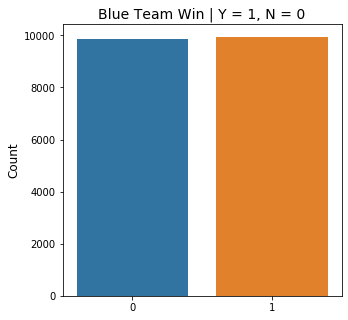

In [8]:
plt.figure(figsize=(5, 5))

sns.countplot(train['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

The blue team's winning percentage was found to be little different.

## 3.4 Categorical Variable


- blueFirstTowerLane: Blue team's first kill lane for 10 minutes.


- blueDragnoType: Type of Dragon killed by Blue Team for 10 minutes.


- redFirstTowerLane: Red team's first kill lane for 10 minutes.


- redDragnoType: Type of Dragon killed by Red Team for 10 minutes.

Let's check the frequency of categorical variables.

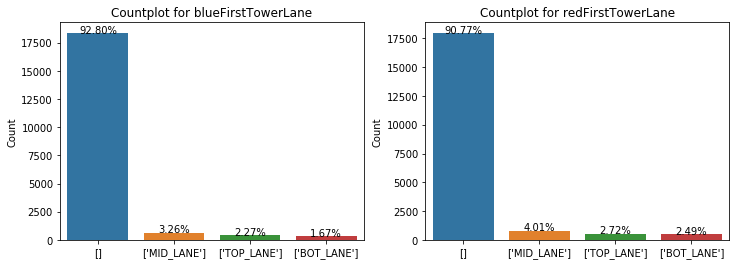

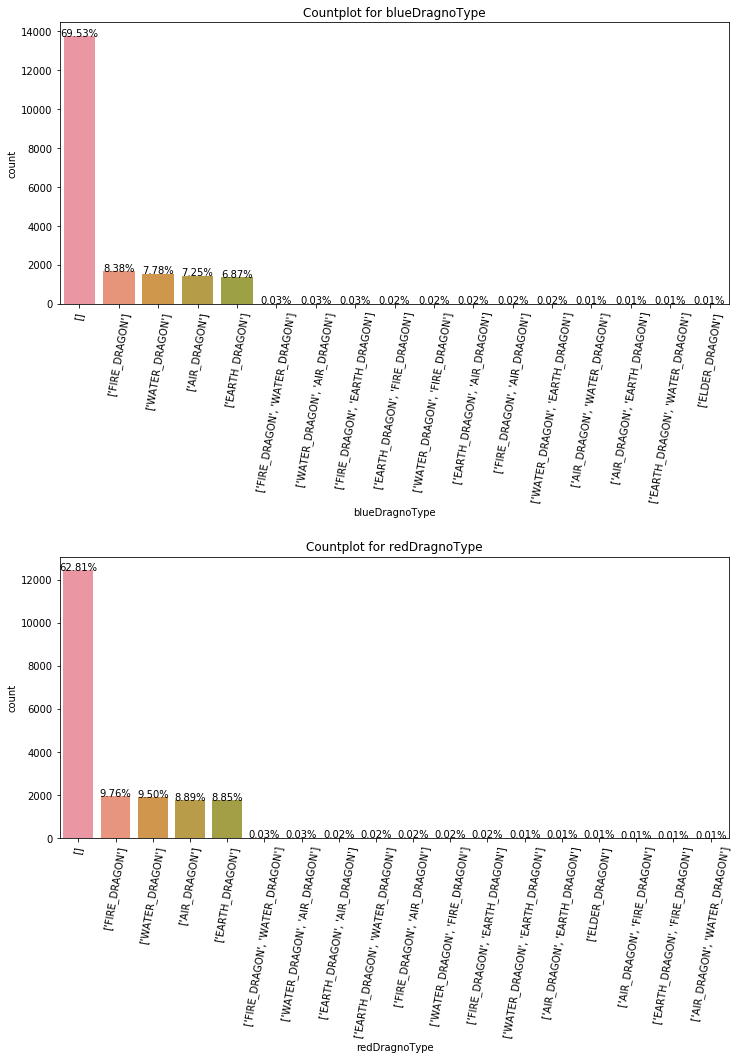

In [9]:
cat_cols = ['blueFirstTowerLane', 'redFirstTowerLane', 'blueDragnoType', 'redDragnoType']
length = len(train)

f = plt.figure(figsize = (12, 4))
for i,cat_col in enumerate(cat_cols[:2]):
    f.add_subplot(1, 2, i + 1)
    ax = sns.countplot(train[cat_col], order = train[cat_col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
    
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("Countplot for {}".format(cat_col))
    
f = plt.figure(figsize = (12, 15))
for i, cat_col in enumerate(cat_cols[2:]):
    f.add_subplot(2, 1, i + 1)
    ax = sns.countplot(train[cat_col], order = train[cat_col].value_counts().index)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
    
    plt.title("Countplot for {}".format(cat_col))
    plt.xticks(rotation = 80)
    plt.subplots_adjust(hspace = 0.9)

In most games, line kill didn't occur for 10 minutes. Also, the number of times a dragon was killed was less than one.

Here's to note: some of the games killed the elder dragon within 10 minutes of its beginning. The elder dragon appears after a team kills up to four dragons. This game is likely to have been misobserved because the first dragon is created five minutes after the game starts. Therefore, check the game that killed the elder dragon first.

In [22]:
train.loc[(train['blueDragnoType'] == "['ELDER_DRAGON']") | (train['redDragnoType'] == "['ELDER_DRAGON']")]

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
26346,3959729584,37287,7519,40,8.0,150,5,0,18,21,...,3,1,0,2,0,1,['ELDER_DRAGON'],1,0,0
18830,3957862092,50508,6165,51,10.2,245,43,0,35,44,...,1,0,1,0,0,0,[],0,0,1
19996,3942684660,38444,2159,45,9.0,217,53,0,24,32,...,3,1,2,0,0,1,['ELDER_DRAGON'],1,0,0


Among the training data, it can be seen that only three matches were observed. Among the training data, it can be seen that only three matches were observed. Among them, the Blue and Red teams killed the elder dragon once and twice, respectively.

As I said before, the dragon first appears five minutes after the start of the game. So it's impossible to kill a dragon twice within 10 minutes of the game.

In [33]:
train.loc[(train['blueDragnoType'] != '[]') & (train['blueDragnoType'] != "['FIRE_DRAGON']") & (train['blueDragnoType'] != "['WATER_DRAGON']") &
         (train['blueDragnoType'] != "['AIR_DRAGON']") & (train['blueDragnoType'] != "['EARTH_DRAGON']")].head()

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
9188,4121847711,43720,6035,46,9.2,255,22,0,30,11,...,0,0,0,0,0,0,[],0,0,1
23682,4088525106,43005,4959,48,9.6,172,43,0,42,40,...,1,1,0,0,0,0,[],0,0,0
21031,4123586420,41819,6999,44,8.8,204,24,0,33,23,...,1,0,1,0,0,0,[],0,0,1
24408,4105961472,46115,3916,47,9.4,249,43,0,32,28,...,0,0,0,0,0,0,[],0,0,1
23102,4126782387,46719,4441,48,9.6,191,144,0,40,29,...,2,1,1,0,0,0,[],0,0,1


A total of 39 game ids were observed where this impossible situation occurs. One thing to note is that in this case, the Red team didn't kill one dragon.

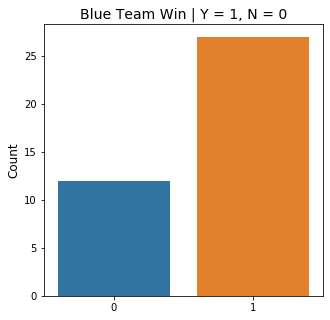

In [37]:
blue_over_two_dragon = train.loc[(train['blueDragnoType'] != '[]') & (train['blueDragnoType'] != "['FIRE_DRAGON']") & (train['blueDragnoType'] != "['WATER_DRAGON']") &
         (train['blueDragnoType'] != "['AIR_DRAGON']") & (train['blueDragnoType'] != "['EARTH_DRAGON']")]

plt.figure(figsize=(5, 5))

sns.countplot(blue_over_two_dragon['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

If you don't assume this is anomaly, you can see that the team that killed two or more dragons is more likely to win within 10 minutes of the game.

In [34]:
train.loc[(train['redDragnoType'] != '[]') & (train['redDragnoType'] != "['FIRE_DRAGON']") & (train['redDragnoType'] != "['WATER_DRAGON']") &
         (train['redDragnoType'] != "['AIR_DRAGON']") & (train['redDragnoType'] != "['EARTH_DRAGON']")].head()

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
11337,4156414549,40806,3381,47,9.4,200,29,0,30,41,...,3,2,0,1,0,1,"['FIRE_DRAGON', 'WATER_DRAGON']",2,0,0
7231,4135691926,36518,4898,44,8.8,227,24,0,16,26,...,0,0,0,0,0,1,"['EARTH_DRAGON', 'AIR_DRAGON']",2,0,0
11769,4128737503,47386,2568,48,9.6,249,17,0,38,26,...,1,0,1,0,0,1,"['WATER_DRAGON', 'FIRE_DRAGON']",2,0,1
5945,4131643571,35955,4230,43,8.6,187,6,0,23,42,...,4,1,1,2,0,1,"['EARTH_DRAGON', 'WATER_DRAGON']",2,0,0
24924,4137430963,35150,6215,41,8.2,184,4,0,17,32,...,5,1,1,3,1,1,"['FIRE_DRAGON', 'AIR_DRAGON']",2,0,0


Likewise, if the Red team had killed more than two dragons, the Blue team couldn't have killed one dragon.

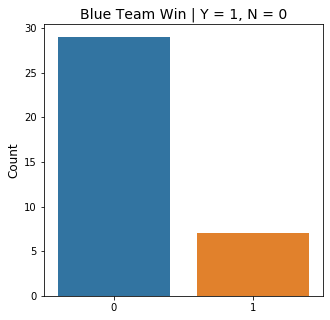

In [38]:
red_over_two_dragon = train.loc[(train['redDragnoType'] != '[]') & (train['redDragnoType'] != "['FIRE_DRAGON']") & (train['redDragnoType'] != "['WATER_DRAGON']") &
         (train['redDragnoType'] != "['AIR_DRAGON']") & (train['redDragnoType'] != "['EARTH_DRAGON']")]

plt.figure(figsize=(5, 5))

sns.countplot(red_over_two_dragon['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

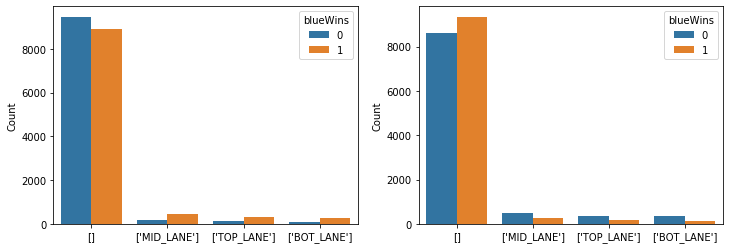

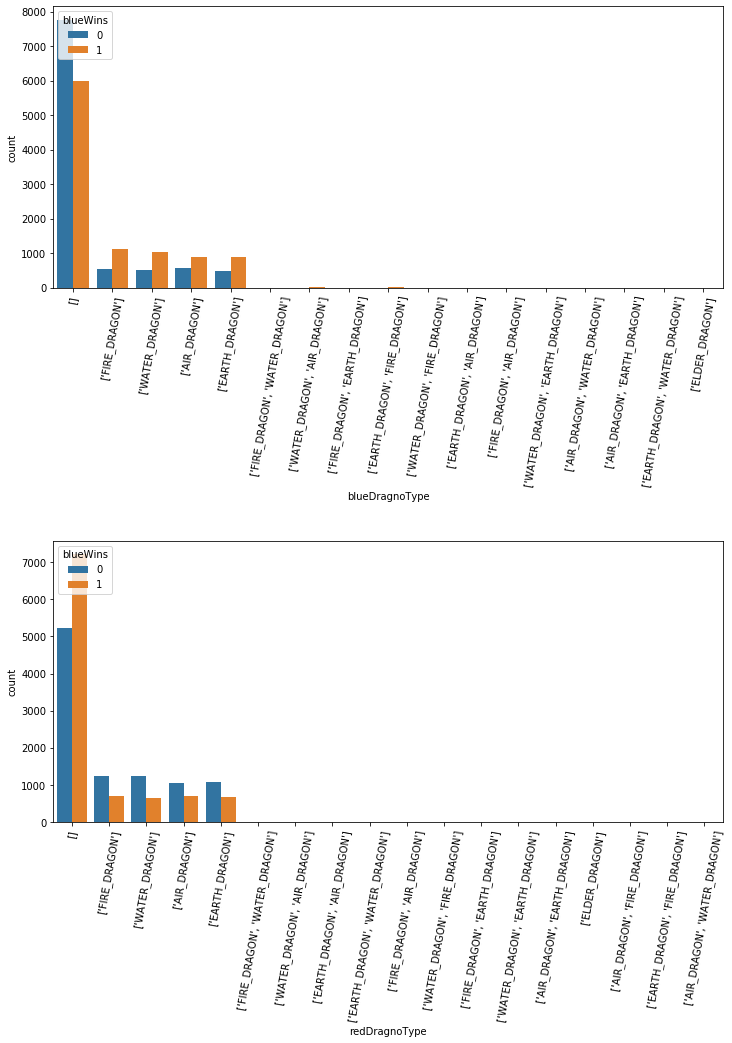

In [10]:
cat_cols = ['blueFirstTowerLane', 'redFirstTowerLane', 'blueDragnoType', 'redDragnoType']
length = len(train)

f = plt.figure(figsize = (12, 4))
for i,cat_col in enumerate(cat_cols[:2]):
    f.add_subplot(1, 2, i + 1)
    ax = sns.countplot(train[cat_col], hue = train['blueWins'],order = train[cat_col].value_counts().index)
    
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("")
    
f = plt.figure(figsize = (12, 15))
for i, cat_col in enumerate(cat_cols[2:]):
    f.add_subplot(2, 1, i + 1)
    ax = sns.countplot(train[cat_col], hue = train['blueWins'], order = train[cat_col].value_counts().index)
    
    plt.xticks(rotation = 80)
    plt.subplots_adjust(hspace = 0.9)